**EXPLORATORY DATA ANALYSIS ON Loan Default Prediction DATASET**

***IMPORTING NECESSARY LIBRARIES***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***LOADING THE DATASET***

In [6]:
import zipfile
import os

zip_path = "/workspaces/CreditPathAI/data/archive (8).zip"  

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")

# 2. Get list of files inside the extracted folder
files = os.listdir("unzipped_data")

csv_files = [f for f in files if f.endswith(".csv")]

if csv_files:
    first_csv = os.path.join("unzipped_data", csv_files[0])
    df = pd.read_csv(first_csv)
    print("✅ First CSV file loaded:", csv_files[0])
    print(df.head())
else:
    print("❌ No CSV files found inside the zip.")


✅ First CSV file loaded: Loan_Default.csv
      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0  

***ABOUT THE DATASET***

In [7]:
print("Shape of dataset")
print("Shape of dataset:", df.shape)

Shape of dataset
Shape of dataset: (148670, 34)


In [8]:
print("Data types & missing values")
print(df.info())

Data types & missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  U

In [9]:
print("Summary statistics for numerical columns")
print(df.describe().T)

Summary statistics for numerical columns


                         count           mean            std           min  \
ID                    148670.0   99224.500000   42917.476598  24890.000000   
year                  148670.0    2019.000000       0.000000   2019.000000   
loan_amount           148670.0  331117.743997  183909.310127  16500.000000   
rate_of_interest      112231.0       4.045476       0.561391      0.000000   
Interest_rate_spread  112031.0       0.441656       0.513043     -3.638000   
Upfront_charges       109028.0    3224.996127    3251.121510      0.000000   
term                  148629.0     335.136582      58.409084     96.000000   
property_value        133572.0  497893.465696  359935.315562   8000.000000   
income                139520.0    6957.338876    6496.586382      0.000000   
Credit_Score          148670.0     699.789103     115.875857    500.000000   
LTV                   133572.0      72.746457      39.967603      0.967478   
Status                148670.0       0.246445       0.430942    

In [10]:
print("Summary statistics for categorical columns")
print(df.describe(include=['object', 'category']).T)

Summary statistics for categorical columns
                            count unique       top    freq
loan_limit                 145326      2        cf  135348
Gender                     148670      4      Male   42346
approv_in_adv              147762      2     nopre  124621
loan_type                  148670      3     type1  113173
loan_purpose               148536      4        p3   55934
Credit_Worthiness          148670      2        l1  142344
open_credit                148670      2      nopc  148114
business_or_commercial     148670      2     nob/c  127908
Neg_ammortization          148549      2   not_neg  133420
interest_only              148670      2   not_int  141560
lump_sum_payment           148670      2  not_lpsm  145286
construction_type          148670      2        sb  148637
occupancy_type             148670      3        pr  138201
Secured_by                 148670      2      home  148637
total_units                148670      4        1U  146480
credit_type  

In [11]:
print("Missing value count")
print(df.isnull().sum())

Missing value count
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200


/tmp/ipykernel_6039/3364650231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="viridis")


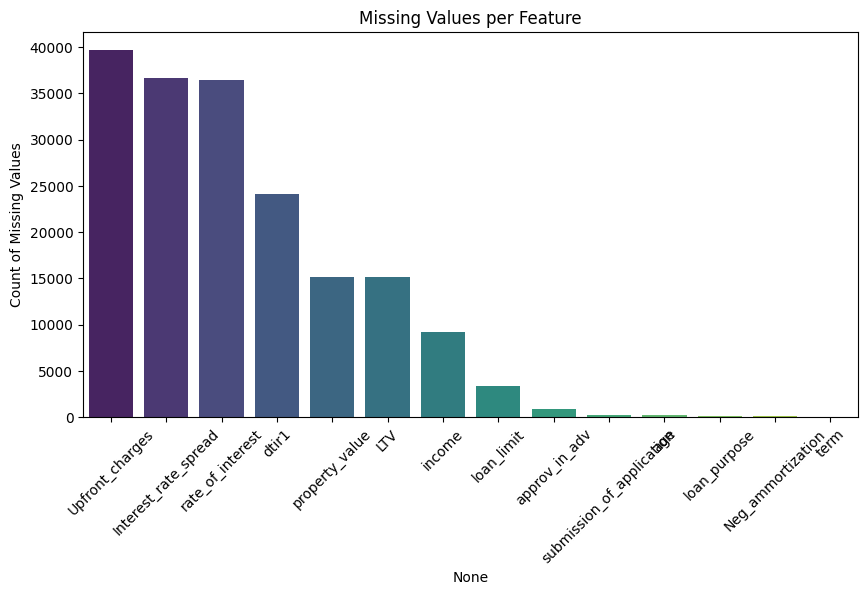

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Missing Values per Feature")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

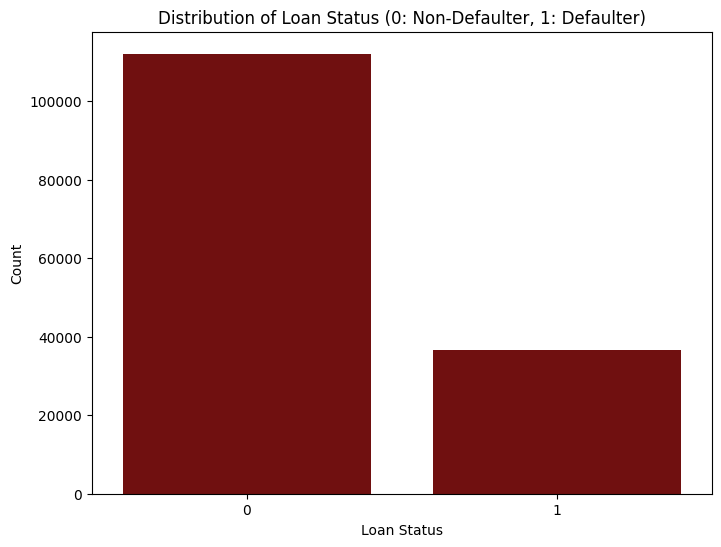

In [13]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df,color = 'maroon')
plt.title('Distribution of Loan Status (0: Non-Defaulter, 1: Defaulter)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [14]:
# Print the exact counts
print("\nLoan Status Counts:")
print(df['Status'].value_counts())
print("\nLoan Status Proportions:")
print(df['Status'].value_counts(normalize=True) * 100)


Loan Status Counts:
Status
0    112031
1     36639
Name: count, dtype: int64

Loan Status Proportions:
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


**DATA PROCESSING**

In [15]:
# Drop the ID column
df.drop('ID', axis=1, inplace=True)

In [16]:
df['year'].value_counts()

year
2019    148670
Name: count, dtype: int64

In [17]:
#Dropping the year columns since it is having same information across all the rows
df.drop('year', axis=1, inplace=True)
print("year column dropped.")

year column dropped.


In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(num_cols)}")
for i in num_cols:
  df[i].fillna(df[i].median(), inplace=True)

Numerical columns: ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


/tmp/ipykernel_6039/1370871299.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
/tmp/ipykernel_6039/1370871299.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [19]:
# Identify categorical columns (dtype='object')
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nCategorical columns to be encoded: {list(categorical_cols)}")


Categorical columns to be encoded: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


In [20]:
for i in categorical_cols:
  df[i].fillna(df[i].mode()[0], inplace=True)
print('handled null values')

/tmp/ipykernel_6039/1382049581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


handled null values


In [21]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nShape of the dataframe after one-hot encoding:", df_encoded.shape)
print("First 5 rows of the encoded dataframe:")
print(df_encoded.head(1).T)


Shape of the dataframe after one-hot encoding: (148670, 49)
First 5 rows of the encoded dataframe:
                                           0
loan_amount                           116500
rate_of_interest                        3.99
Interest_rate_spread                  0.3904
Upfront_charges                      2596.45
term                                   360.0
property_value                      118000.0
income                                1740.0
Credit_Score                             758
LTV                                98.728814
Status                                     1
dtir1                                   45.0
loan_limit_ncf                         False
Gender_Joint                           False
Gender_Male                            False
Gender_Sex Not Available                True
approv_in_adv_pre                      False
loan_type_type2                        False
loan_type_type3                        False
loan_purpose_p2                        False


In [22]:
df_encoded.shape

(148670, 49)

In [23]:
print("Missing value count")
print(df.isnull().sum())

Missing value count
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1              

In [24]:
df.duplicated().sum()

np.int64(0)

MODEL BUILDING

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (148670, 48)
Target (y) shape: (148670,)


In [30]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (118936, 48)
Testing set shape: (29734, 48)


In [31]:
#Scaling the DATA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling applied successfully.")


Feature scaling applied successfully.


In [32]:
# HANDLING THE CLASS IMBALANCE

smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
print(f"Original training class distribution:\n{y_train.value_counts()}")

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_scaled)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

print(f"\nResampled training class distribution:\n{y_train_resampled.value_counts()}")

Original training class distribution:
Status
0    89625
1    29311
Name: count, dtype: int64

Resampled training class distribution:
Status
0    89625
1    89625
Name: count, dtype: int64


Training the classifications models

In [36]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- Training {name} ---")
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    print(f"{name} trained successfully.")

--- Training Logistic Regression ---


Logistic Regression trained successfully.
--- Training Random Forest ---
Random Forest trained successfully.
--- Training XGBoost ---


/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:45:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained successfully.
--- Training K-Nearest Neighbors ---
K-Nearest Neighbors trained successfully.
--- Training Decision Tree ---
Decision Tree trained successfully.
--- Training Naive Bayes ---
Naive Bayes trained successfully.


TESTING AND EVALUATING THE MODELS


--- Evaluation for Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     22406
           1       0.66      0.72      0.69      7328

    accuracy                           0.84     29734
   macro avg       0.78      0.80      0.79     29734
weighted avg       0.85      0.84      0.84     29734

ROC-AUC Score: 0.8674


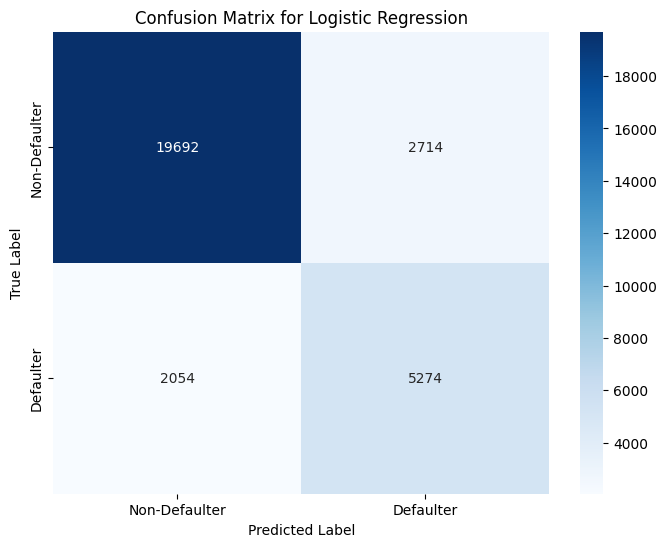


--- Evaluation for Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC Score: 1.0000


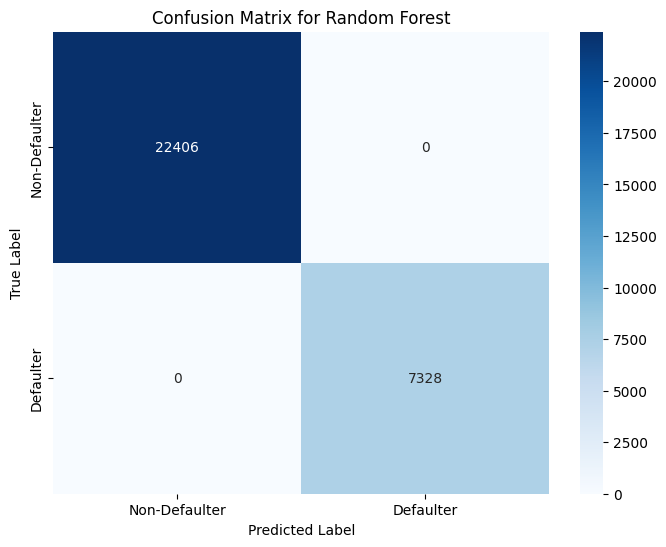


--- Evaluation for XGBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC Score: 1.0000


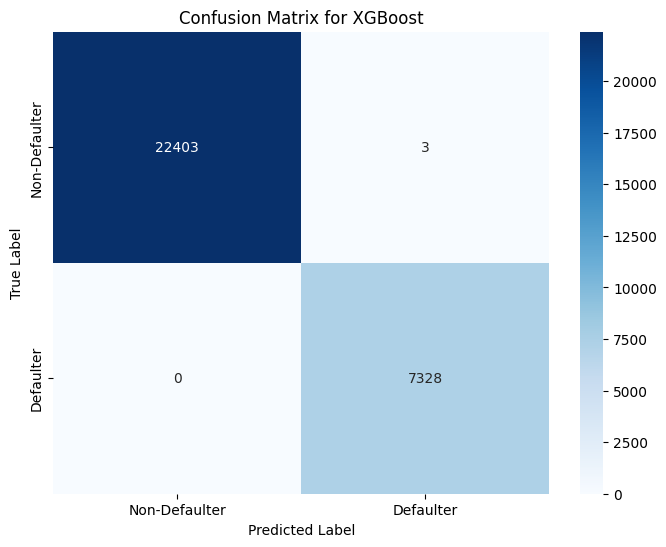


--- Evaluation for K-Nearest Neighbors ---
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     22406
           1       0.59      0.85      0.70      7328

    accuracy                           0.82     29734
   macro avg       0.77      0.83      0.79     29734
weighted avg       0.86      0.82      0.83     29734

ROC-AUC Score: 0.9060


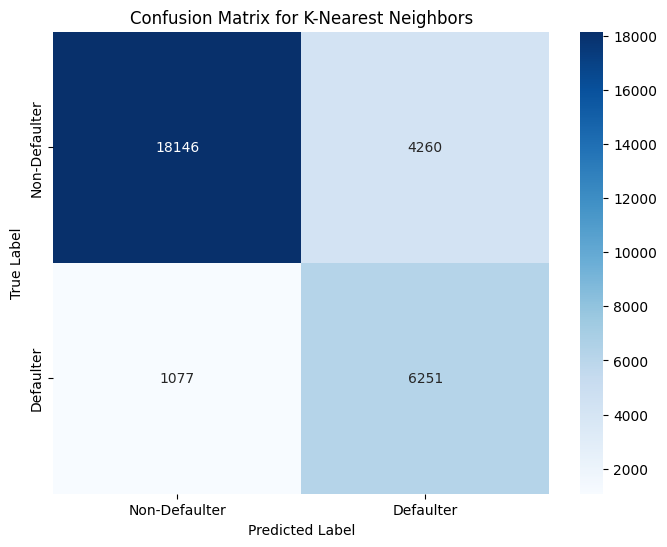


--- Evaluation for Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC Score: 0.9998


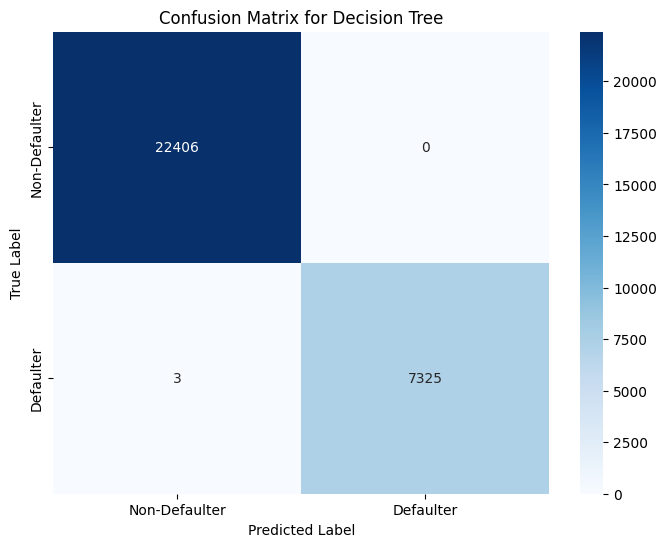


--- Evaluation for Naive Bayes ---
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     22406
           1       1.00      0.48      0.65      7328

    accuracy                           0.87     29734
   macro avg       0.93      0.74      0.79     29734
weighted avg       0.89      0.87      0.85     29734

ROC-AUC Score: 1.0000


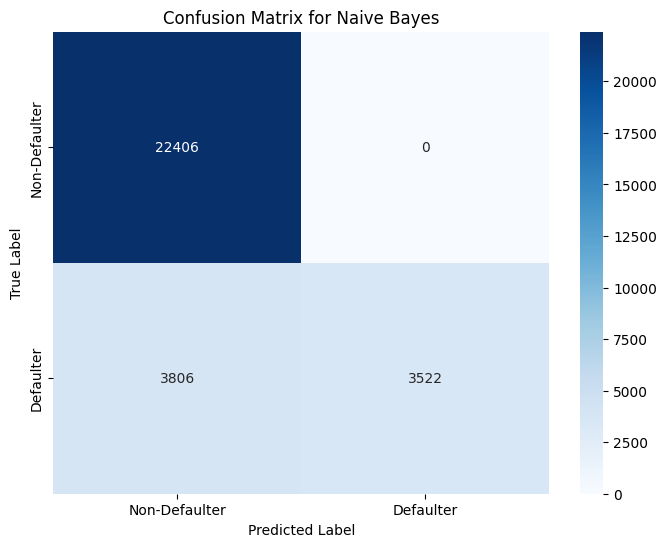

In [37]:
# Apply the imputer to the test data
X_test_imputed = imputer.transform(X_test_scaled)


for name, model in models.items():
    print(f"\n--- Evaluation for {name} ---")

    # Make predictions on the test DATA
    y_pred = model.predict(X_test_imputed)
    y_pred_proba = model.predict_proba(X_test_imputed)[:, 1] # for ROC-AUC

    #Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # ROC-AUC Score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {auc_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defaulter', 'Defaulter'], yticklabels=['Non-Defaulter', 'Defaulter'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()